#Importing necessary libraries

# Starting by importing necassary libraries for data handling, preprocessing, and evaluation.


In [30]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import SimpleImputer
from torch.utils.data import DataLoader, TensorDataset

#Loading the dataset

# Loading the Ames Housing dataset into Pandas DataFrame to look into its structure.

In [31]:
#Loading the dataset
df=pd.read_csv("/content/AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#Kept only important features and dropped others

In [33]:
# Selecting relevant features and dropping remaining
col= ['Lot Area', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars',
                   'Overall Qual','Year Built', 'Year Remod/Add',
                   'Full Bath','Bsmt Qual','Neighborhood','Kitchen Qual',
                   'Garage Type','Overall Cond', 'SalePrice']

df = df[col]
print(df.head())


   Lot Area  Gr Liv Area  Total Bsmt SF  Garage Cars  Overall Qual  \
0     31770         1656         1080.0          2.0             6   
1     11622          896          882.0          1.0             5   
2     14267         1329         1329.0          1.0             6   
3     11160         2110         2110.0          2.0             7   
4     13830         1629          928.0          2.0             5   

   Year Built  Year Remod/Add  Full Bath Bsmt Qual Neighborhood Kitchen Qual  \
0        1960            1960          1        TA        NAmes           TA   
1        1961            1961          1        TA        NAmes           TA   
2        1958            1958          1        TA        NAmes           Gd   
3        1968            1968          2        TA        NAmes           Ex   
4        1997            1998          2        Gd      Gilbert           TA   

  Garage Type  Overall Cond  SalePrice  
0      Attchd             5     215000  
1      Attchd   

In [34]:
# Summary statistics
df.describe()

,Lot Area,Gr Liv Area,Total Bsmt SF,Garage Cars,Overall Qual,Year Built,Year Remod/Add,Full Bath,Overall Cond,SalePrice
count,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,1499.690444,1051.614544,1.766815,6.094881,1971.356314,1984.266553,1.566553,5.563140,180796.060068
std,7880.017759,505.508887,440.615067,0.760566,1.411026,30.245361,20.860286,0.552941,1.111537,79886.692357
min,1300.000000,334.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,12789.000000
25%,7440.250000,1126.000000,793.000000,1.000000,5.000000,1954.000000,1965.000000,1.000000,5.000000,129500.000000
50%,9436.500000,1442.000000,990.000000,2.000000,6.000000,1973.000000,1993.000000,2.000000,5.000000,160000.000000
75%,11555.250000,1742.750000,1302.000000,2.000000,7.000000,2001.000000,2004.000000,2.000000,6.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,5.000000,10.000000,2010.000000,2010.000000,4.000000,9.000000,755000.000000


# Generating a heatmap to visualize the correlation between numerical features and Sale Price.

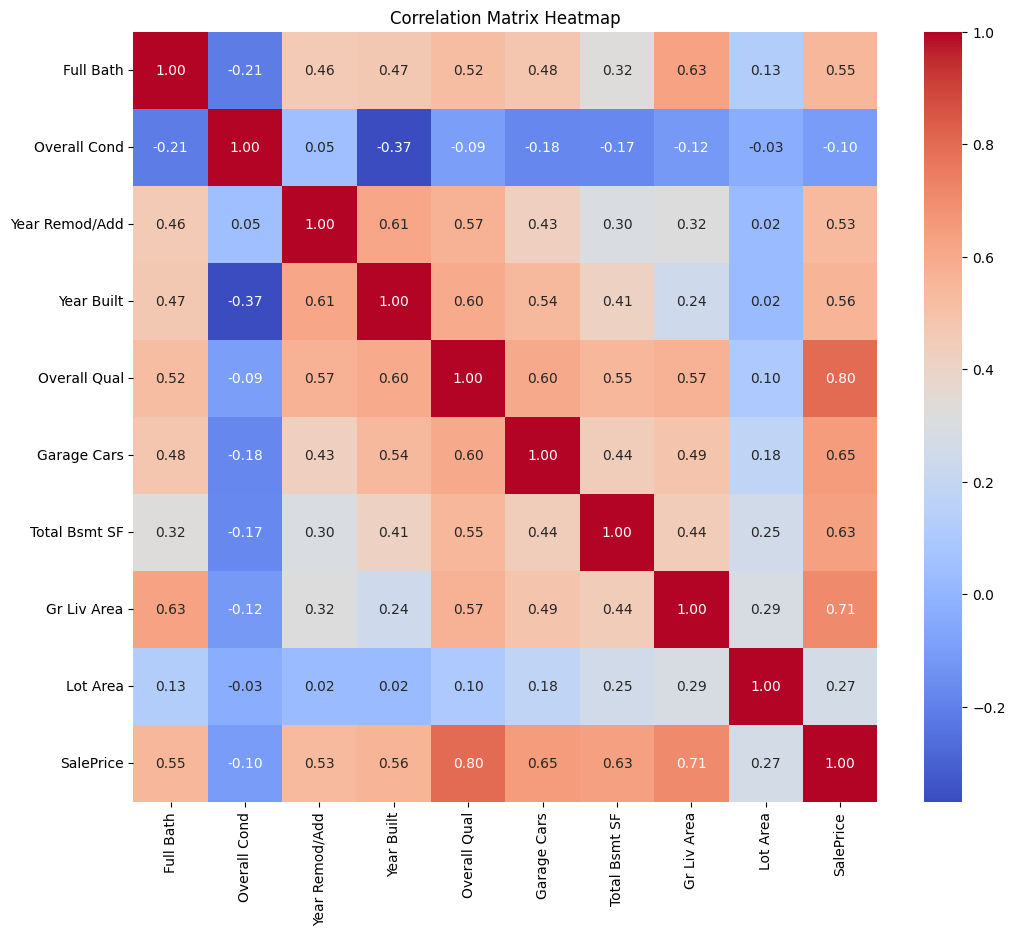

In [35]:
#Data Visualization
# Correlation Heatmap for numerical features

columns_for_heatmap = ['Full Bath', 'Overall Cond', 'Year Remod/Add',
                        'Year Built', 'Overall Qual', 'Garage Cars',
                        'Total Bsmt SF', 'Gr Liv Area', 'Lot Area', 'SalePrice']

heatmap_df = df[columns_for_heatmap]

correlation_matrix = heatmap_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# The histogram shows the distribution of Sale Prices in the dataset.

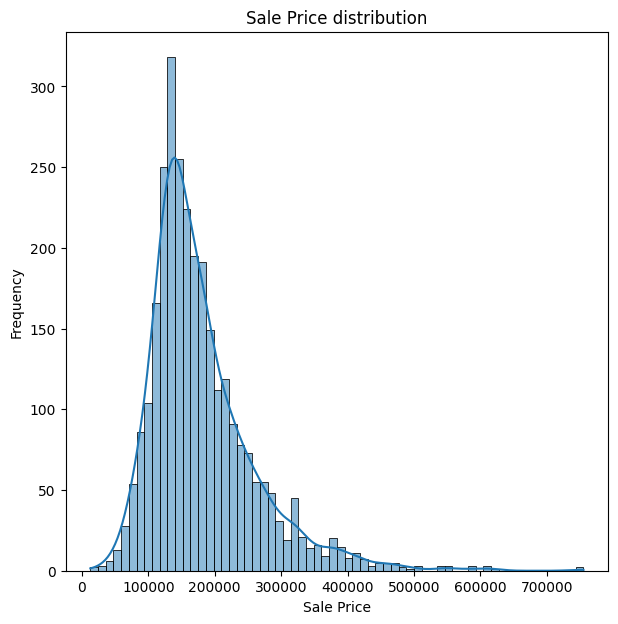

In [36]:
#Sale Price distribution
plt.figure(figsize=(7,7))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Used bar plots to analyze the effect of categorical variables on Sale Price.

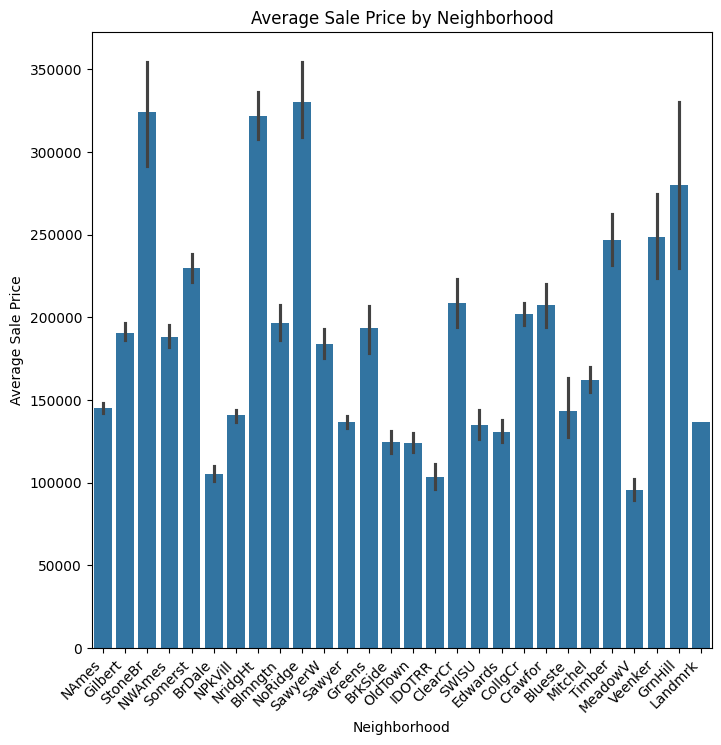

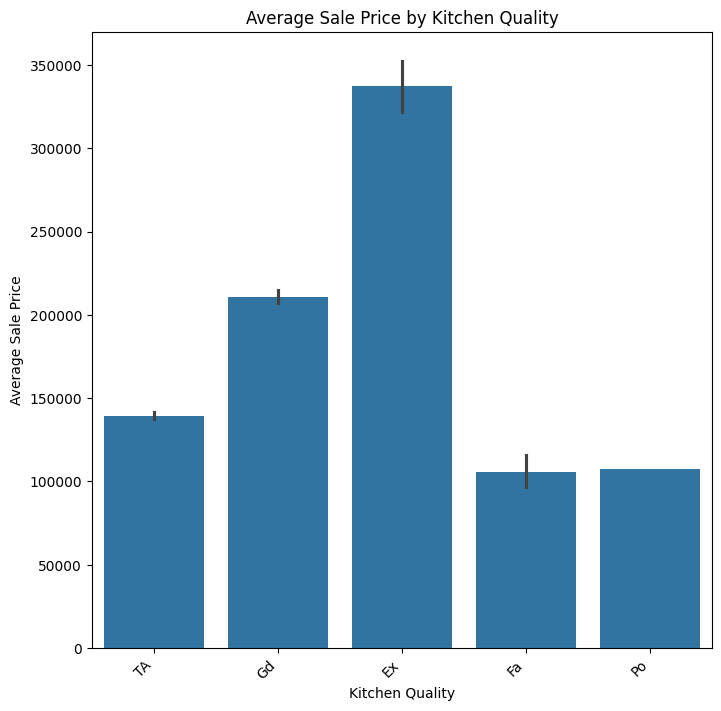

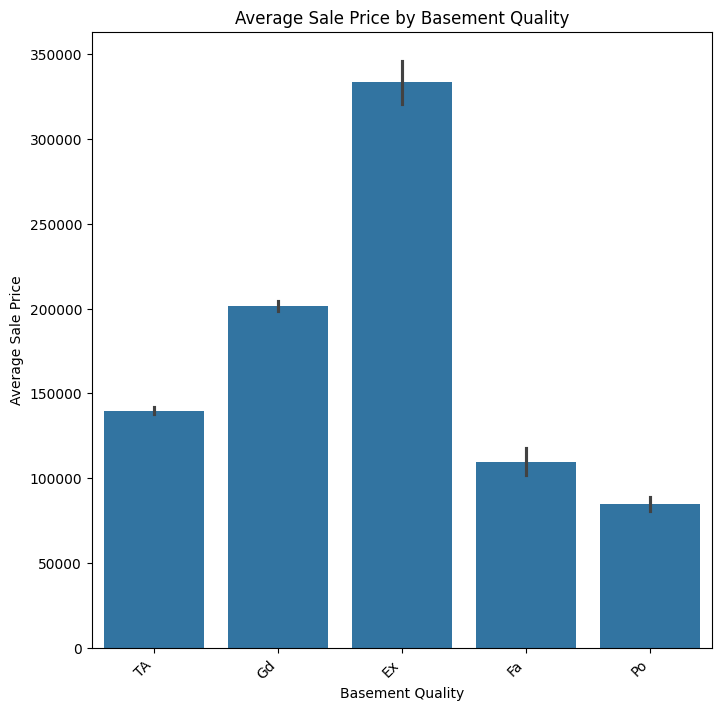

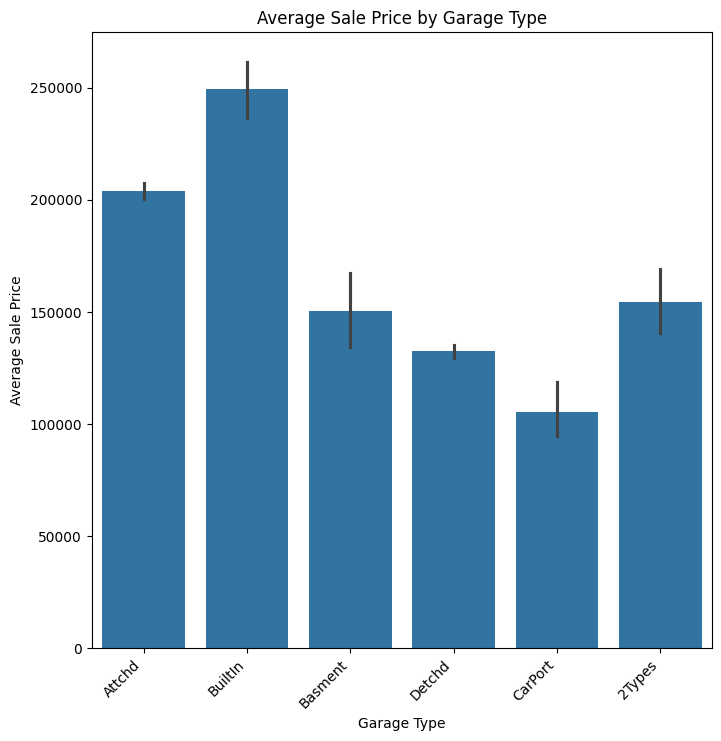

In [37]:
# Feature Analysis for Categorical features
# Sale Price by Neighborhood
plt.figure(figsize=(8,8))
sns.barplot(x='Neighborhood', y='SalePrice', data=df, estimator=np.mean)
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sale Price by Kitchen Qual
plt.figure(figsize=(8,8))
sns.barplot(x='Kitchen Qual', y='SalePrice', data=df, estimator=np.mean)
plt.title('Average Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sale Price by Bsmt Qual
plt.figure(figsize=(8,8))
sns.barplot(x='Bsmt Qual', y='SalePrice', data=df, estimator=np.mean)
plt.title('Average Sale Price by Basement Quality')
plt.xlabel('Basement Quality')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sale Price by Garage Type
plt.figure(figsize=(8,8))
sns.barplot(x='Garage Type', y='SalePrice', data=df, estimator=np.mean)
plt.title('Average Sale Price by Garage Type')
plt.xlabel('Garage Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Used Scatter plots to identify patterns and trends with respect to Sales Price

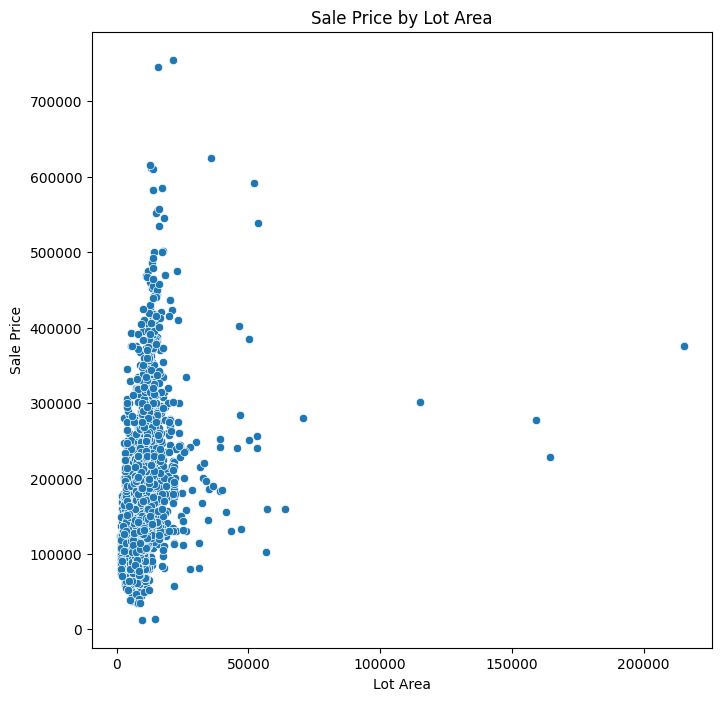

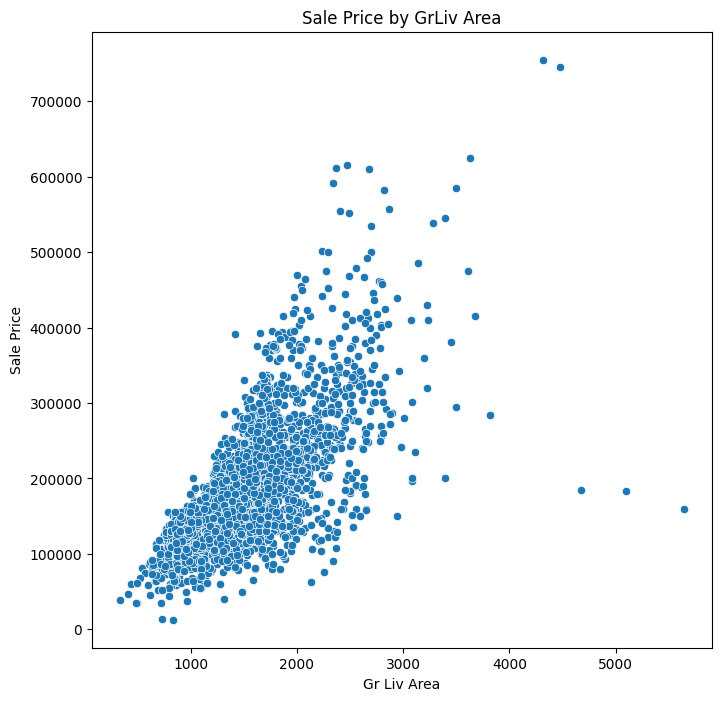

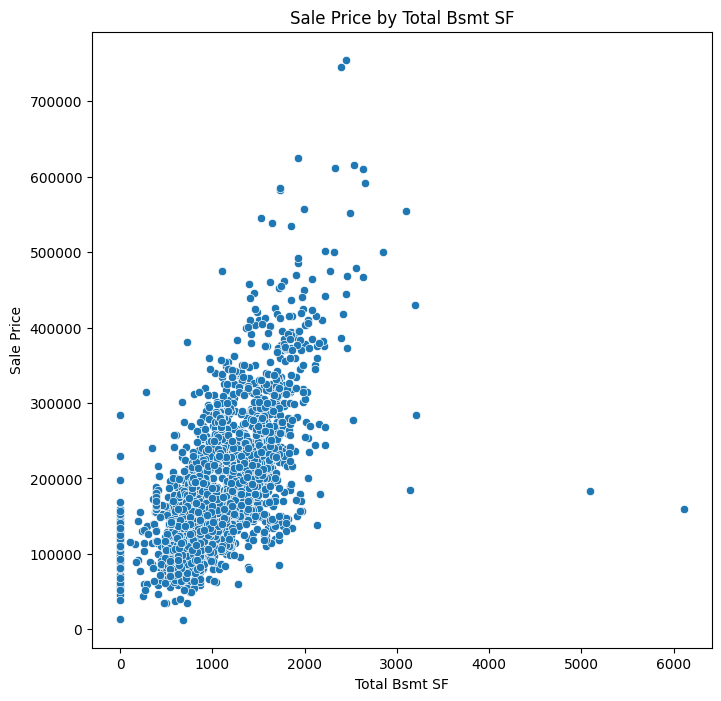

In [38]:
# Feature Analysis Numerical Features

# Sale Price by Lot Area
plt.figure(figsize=(8,8))
sns.scatterplot(x='Lot Area', y='SalePrice', data=df)
plt.title('Sale Price by Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

# Sale Price by Gr Liv Area
plt.figure(figsize=(8,8))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('Sale Price by GrLiv Area')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()

# Sale Price by Total Bsmt SF
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=df)
plt.title('Sale Price by Total Bsmt SF')
plt.xlabel('Total Bsmt SF')
plt.ylabel('Sale Price')
plt.show()

# Counted the missing values and applied appropriate imputation strategies.

In [39]:
# Missing Value Handling
# Counting missing value
missing_values = df.isnull().sum()
missing_values

,0
Lot Area,0
Gr Liv Area,0
Total Bsmt SF,1
Garage Cars,1
Overall Qual,0
Year Built,0
Year Remod/Add,0
Full Bath,0
Bsmt Qual,80
Neighborhood,0


In [40]:
from sklearn.impute import SimpleImputer
missing_val_col = [col for col in df.columns if df[col].isnull().any()]


for column in missing_val_col:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')  # Replacing with unknow
    else:
        imputer = SimpleImputer(strategy='median')
        df[column] = imputer.fit_transform(df[[column]]) # Applying imputation
# Final
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Gr Liv Area     2930 non-null   int64  
 2   Total Bsmt SF   2930 non-null   float64
 3   Garage Cars     2930 non-null   float64
 4   Overall Qual    2930 non-null   int64  
 5   Year Built      2930 non-null   int64  
 6   Year Remod/Add  2930 non-null   int64  
 7   Full Bath       2930 non-null   int64  
 8   Bsmt Qual       2930 non-null   object 
 9   Neighborhood    2930 non-null   object 
 10  Kitchen Qual    2930 non-null   object 
 11  Garage Type     2930 non-null   object 
 12  Overall Cond    2930 non-null   int64  
 13  SalePrice       2930 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 320.6+ KB
None


In [41]:
#statistics for numerical features
df.describe()

,Lot Area,Gr Liv Area,Total Bsmt SF,Garage Cars,Overall Qual,Year Built,Year Remod/Add,Full Bath,Overall Cond,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,1499.690444,1051.593515,1.766894,6.094881,1971.356314,1984.266553,1.566553,5.563140,180796.060068
std,7880.017759,505.508887,440.541315,0.760449,1.411026,30.245361,20.860286,0.552941,1.111537,79886.692357
min,1300.000000,334.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,12789.000000
25%,7440.250000,1126.000000,793.000000,1.000000,5.000000,1954.000000,1965.000000,1.000000,5.000000,129500.000000
50%,9436.500000,1442.000000,990.000000,2.000000,6.000000,1973.000000,1993.000000,2.000000,5.000000,160000.000000
75%,11555.250000,1742.750000,1301.500000,2.000000,7.000000,2001.000000,2004.000000,2.000000,6.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,5.000000,10.000000,2010.000000,2010.000000,4.000000,9.000000,755000.000000


# Now separating the target variable and applying scaling and encoding to the features.

In [42]:
# Preprocessing

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Separating numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
categ_features = X.select_dtypes(include=['object']).columns

# Applying Standard Scaler and One Hot Encoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# Standardizing
X_num = scaler.fit_transform(X[num_features])

# One-hot encoding
X_cat = encoder.fit_transform(X[categ_features])

# Combining
X_final= np.concatenate([X_num, X_cat], axis=1)

In [43]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=33)

# Random Forest

In [44]:
# Initializing and training the Random Forest model
rand_for = RandomForestRegressor(random_state=33)
rand_for.fit(X_train, y_train)

# Predicting
y_pred = rand_for.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 17131.505895010567
Root Mean Squared Error: 29788.02723769507
R-squared: 0.8782274868558273


# Hyperparameter tuning for random forest..

In [45]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = { 'min_samples_leaf': [1,2,4,6], 'max_depth': [5,10,15],
    'n_estimators': [50,70,100,150],
    'min_samples_split': [2,5,7,10]}


grid_search = GridSearchCV(estimator=rand_for, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fitting the training data
grid_search.fit(X_train, y_train)

# Finding the best parameters
print("Best parameters: ", grid_search.best_params_)

# Evaluation of model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_mae = mean_absolute_error(y_test, y_pred_best)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_r2score= r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error : {best_mae}")
print(f"Root Mean Squared Error : {best_rmse}")
print(f"R-squared: {best_r2score}")


Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error : 17174.33645106686
Root Mean Squared Error : 29331.014611094266
R-squared: 0.8819353301444577


# Now traing again the random forest with the best parameters obtained by hyperparameter tuning..

In [46]:
# Retraining the random forest model with best parameters
rand_for_best = RandomForestRegressor(max_depth = 15, min_samples_leaf= 1,
                                      min_samples_split =2, n_estimators=150,  random_state=33)
rand_for_best.fit(X_train, y_train)

# Predicting
y_pred1 = rand_for_best.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)

print(f"Mean Absolute Error for best parameter: {mae}")
print(f"Root Mean Squared Error for best parameter: {rmse}")
print(f"R-squared for bestparameter: {r2}")

Mean Absolute Error for best parameter: 17174.33645106686
Root Mean Squared Error for best parameter: 29331.014611094266
R-squared for bestparameter: 0.8819353301444577


# Neural Network

In [47]:
# Changing train and test sets into tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Defining the Neural Network
input_size = X_train_tensor.shape[1]

model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 1)
)

# Training the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 150
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

     # printing loss for every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():10f}')

# Evaluating the model
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy().flatten()

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

Epoch [10/150], Loss: 22240262144.000000
Epoch [20/150], Loss: 1364950144.000000
Epoch [30/150], Loss: 1547612928.000000
Epoch [40/150], Loss: 9466639360.000000
Epoch [50/150], Loss: 724118272.000000
Epoch [60/150], Loss: 2748892160.000000
Epoch [70/150], Loss: 462178080.000000
Epoch [80/150], Loss: 345691584.000000
Epoch [90/150], Loss: 996115072.000000
Epoch [100/150], Loss: 1447556480.000000
Epoch [110/150], Loss: 1400299520.000000
Epoch [120/150], Loss: 689396864.000000
Epoch [130/150], Loss: 765328768.000000
Epoch [140/150], Loss: 1092056320.000000
Epoch [150/150], Loss: 730307008.000000
Mean Absolute Error: 22852.669921875
Root Mean Squared Error: 35991.623914460986
R-squared: 0.82222580909729


# Now comparing the two models - Random Forest and Neural Network

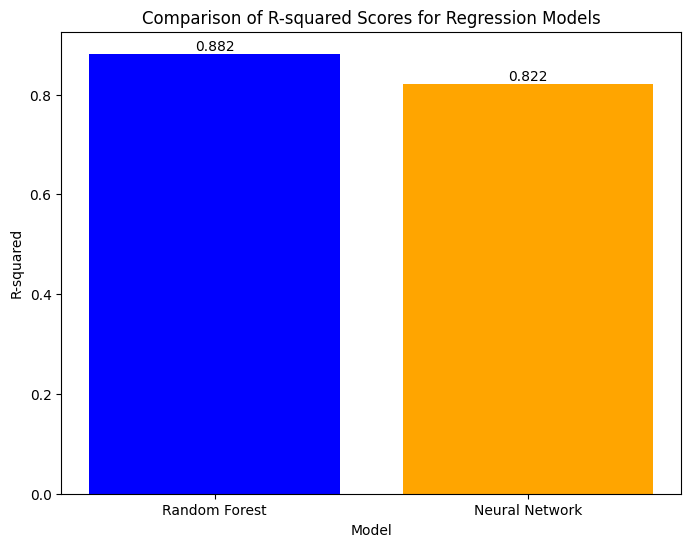

In [48]:
# Model comparison
random_forest_r2score= r2_score(y_test, y_pred1)
neural_network_r2score = r2_score(y_test, y_pred)

models = ['Random Forest', 'Neural Network']
r2_scores = [random_forest_r2score, neural_network_r2score]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores for Regression Models')

# Add values on top of the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score, str(round(score, 3)), ha='center', va='bottom')

plt.show()

The R2 score achieved by Random Forest model is more than that of Neural Network model.
So, here the Random Forest model outperformed the Neural Network model.